# 5.1 Rating Scale Model (RSM)

As in the Rasch model, $θ_v$ denotes the person parameter
(the latent trait or ability being measured) and $β_i$ the item location
parameter (corresponding to item's difficulty), here again written as easiness
parameter in order to be consistent with the
specification used in the `eRm` package. Each category h gets a category parameter
ωh, constant across items. This means that item differences are solely reflected by
the shifts in $β_i$ across items. Belonging to the Rasch family, the RSM shares all the
desirable Rasch measurement properties. The downside is that the model is pretty
strict since the same assumptions need to be fulfilled as in the Rasch model.

## The dataset

To illustrate an RSM fit, we use data analyzed in Bond and Fox (2015). The
Children’s Empathic Attitudes Questionnaire (CEAQ; Funk et al., 2008) is a 16-
item scale to measure empathy of late elementary and middle school-aged children.
Each item has three ordered responses: “no” (1), “maybe” (2), and “yes” (3). The
sample size is n = 208. Three covariates (age, gender, grade) were collected as
well. Let us extract the items and set the lowest category to 0 in order to make it
`eRm` compatible ().

## Load, prepare and inspect the dataset

In [ ]:
# Load the data in R
ro.r("data(CEAQ)")

# Get as DataFrame
CEAQ = pandas2ri.rpy2py(ro.globalenv['CEAQ'])

# Subtract 1 from every response to make the dataset eRm compatible
itceaq = CEAQ.iloc[:, :16] - 1

# Inspect the dataset
print(itceaq.head())


   ceaq1  ceaq2  ceaq3  ceaq4  ceaq5  ceaq6  ceaq7  ceaq8  ceaq9  ceaq10  \
1    2.0    2.0    2.0    1.0    2.0    0.0    2.0    2.0    1.0     2.0   
2    1.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0    0.0     2.0   
3    2.0    2.0    2.0    1.0    2.0    1.0    2.0    0.0    2.0     2.0   
4    2.0    1.0    2.0    2.0    1.0    2.0    2.0    0.0    0.0     2.0   
5    2.0    1.0    2.0    2.0    1.0    0.0    2.0    2.0    0.0     2.0   

   ceaq11  ceaq12  ceaq13  ceaq14  ceaq15  ceaq16  
1     2.0     2.0     1.0     2.0     2.0     2.0  
2     2.0     2.0     0.0     2.0     2.0     2.0  
3     1.0     2.0     1.0     2.0     2.0     2.0  
4     2.0     2.0     0.0     2.0     1.0     2.0  
5     1.0     2.0     1.0     2.0     1.0     2.0  


### Fit the model

In [ ]:
# Put data back into R
ro.globalenv['itceaq'] = itceaq

# Fit the model
ro.r("fitrsm <- RSM(itceaq)")

# Get person parameters
ro.r("ppar2 <- person.parameter(fitrsm)")

ifit0 = ro.r("itemfit(ppar2)")
print(ifit0)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  210.938 205   0.373      1.024     0.918    0.201  -0.704   0.504
ceaq2  190.205 205   0.763      0.923     0.897   -0.496  -0.977   0.549
ceaq3  259.718 205   0.006      1.261     0.966    1.305  -0.215   0.396
ceaq4  222.146 205   0.196      1.078     0.995    0.724  -0.024   0.289
ceaq5  167.622 205   0.974      0.814     0.864   -1.576  -1.471   0.511
ceaq6  191.085 205   0.749      0.928     0.914   -0.764  -1.055   0.407
ceaq7  162.424 205   0.987      0.788     0.886   -1.506  -1.074   0.588
ceaq8  146.463 205   0.999      0.711     0.738   -3.409  -3.523   0.622
ceaq9  181.586 205   0.879      0.881     0.891   -1.311  -1.373   0.512
ceaq10 380.868 205   0.000      1.849     1.650    3.959   4.549  -0.044
ceaq11 149.579 205   0.999      0.726     0.753   -3.297  -3.342   0.635
ceaq12 192.132 205   0.731      0.933     0.980   -0.424  -0.151   0.589
ceaq13 188.073 205   0.796   

We can compare the p-values across items since the degrees of freedom (df) are constant across the tests. Note
that these $χ^2$-statistics exhibit inflated Type I error rates
(which is problematic because since it could lead to the incorrect
identification of misfitting items). Other measures reported
here are the mean square fit (*MSQ*) statistics related to the amount of misfit in the
original data. They should be within a [0.7, 1.3] interval. Outfit statistics result from
dividing the $χ^2$-value by the corresponding df. Due to their sensitivity to outlying scores,
a modified statistic called *infit* is typically preferred due to its robustness to outliers. Both *infit* and *outfit* can
be standardized t-values which should be between −2 and 2.  
In the output above, which items look problematic?

### Repetition
Item 10 and item 15 have a low p-value and high *outfit/infit*
statistics. Let us eliminate item 10 and item 15 and refit the model.

In [ ]:
itceaqsub = itceaq.drop(itceaq.columns[[9,14]], axis=1)

# Put data back into R
ro.globalenv['itceaqsub'] = itceaqsub

# Fit the model
ro.r("fitrsm2 <- RSM(itceaqsub)")

# Get person parameters
ppar2 = ro.r("ppar2 <- person.parameter(fitrsm2)")

# Get item fit
ifit02 = ro.r("itemfit(ppar2)")
print(ifit02)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  225.051 205   0.161      1.092     0.979    0.583  -0.143   0.495
ceaq2  207.044 205   0.447      1.005     0.937    0.084  -0.566   0.553
ceaq3  266.737 205   0.002      1.295     1.018    1.362   0.183   0.412
ceaq4  261.178 205   0.005      1.268     1.111    2.166   1.200   0.273
ceaq5  181.898 205   0.876      0.883     0.938   -0.904  -0.617   0.501
ceaq6  205.813 205   0.471      0.999     0.971    0.024  -0.320   0.408
ceaq7  164.570 205   0.983      0.799     0.922   -1.345  -0.705   0.593
ceaq8  148.237 205   0.999      0.720     0.763   -3.126  -3.044   0.623
ceaq9  188.180 205   0.794      0.913     0.936   -0.871  -0.763   0.508
ceaq11 156.431 205   0.995      0.759     0.792   -2.679  -2.683   0.621
ceaq12 193.162 205   0.713      0.938     0.983   -0.363  -0.126   0.611
ceaq13 185.197 205   0.836      0.899     0.931   -0.956  -0.806   0.526
ceaq14 252.851 205   0.013   

Now there is no item left which shows a suspicious combination of significant p-values
and extreme infit/outfit values. You might notice that the item 3,4 and 14 have significant p-values.

The significant p-values for items 3, 4, and 14 suggest these items might not fit the Rasch model perfectly. This could mean the items are measuring something slightly different from the overall construct being assessed by the questionnaire.
The fact that the other fit statistics (infit, outfit, MSQ) are within acceptable ranges (MSQs 0.7 - 1.3; Outfit > 2.5; Infit -2 - 2) and the discrimination parameters are similar suggests that the misfit of items 3, 4, and 14 might not be severe enough to warrant their removal. \
Therefore, we can include the items, despite their significant p-values.

## Andersen’s LR-test

Let us double-check the model fit using **Andersen’s LR-test**, which has better
inferential properties than the itemfit statistics. It's a statistical test
that assesses whether the item parameters are consistent across different groups
of respondents (in this case, we use grade as splitting criterion).

Note that we have some missing grade values which we impute using the mice
package (van Buuren and Groothuis-Oudshoorn, 2011), since we need to have full
responses on the split criterion. This step would not be necessary if your
dataset does not present missing values.

In [ ]:
ro.r("imp <- mice(CEAQ)")


 iter imp variable
  1   1  age  grade  gender
  1   2  age  grade  gender
  1   3  age  grade  gender
  1   4  age  grade  gender
  1   5  age  grade  gender
  2   1  age  grade  gender
  2   2  age  grade  gender
  2   3  age  grade  gender
  2   4  age  grade  gender
  2   5  age  grade  gender
  3   1  age  grade  gender
  3   2  age  grade  gender
  3   3  age  grade  gender
  3   4  age  grade  gender
  3   5  age  grade  gender
  4   1  age  grade  gender
  4   2  age  grade  gender
  4   3  age  grade  gender
  4   4  age  grade  gender
  4   5  age  grade  gender
  5   1  age  grade  gender
  5   2  age  grade  gender
  5   3  age  grade  gender
  5   4  age  grade  gender
  5   5  age  grade  gender


In [ ]:
ro.r("gradevec <- complete(imp)$grade")

With this code we binarize the grade variable and compute the LR-test. The following code chunk is creating two groups (grades 5-6 and grades 7-8) to compare item parameters between these groups.

In [ ]:
ro.r('levels(gradevec) <- c("grade56", "grade56", "grade78", "grade78")')

LRtest1 = ro.r("LRtest(fitrsm2, gradevec)")
print(LRtest1)


Andersen LR-test: 
LR-value: 23.931 
Chi-square df: 14 
p-value:  0.047 




Even though the p-value is only slightly above 0.05, in conjunction with the itemfit
outcomes, it is safe to assume that the data fit the RSM.

## Wald Test

Note that another option for testing at an item-category level is to use the
Wald test function which computes a p-value for each item-category parameter.
There is no clear rule for situations where, for instance, two item-category parameters
are significant and two are not significant. Whether such an item should be
eliminated or not depends on how strict we want to be when constructing the scale.

As a general *rule of thumb*, significant p-values indicate that the item-category
parameters for some items differ significantly from the average,
suggesting that the RSM's assumption of equal category parameters might not hold perfectly.

In [ ]:
fitWald = ro.r("Waldtest(fitrsm2, gradevec)")
print(fitWald)


Wald test on item level (z-values):

               z-statistic p-value
beta ceaq1.c1        0.368   0.713
beta ceaq1.c2       -0.037   0.971
beta ceaq2.c1        0.343   0.732
beta ceaq2.c2       -0.084   0.933
beta ceaq3.c1       -0.446   0.656
beta ceaq3.c2       -0.808   0.419
beta ceaq4.c1       -1.804   0.071
beta ceaq4.c2       -2.085   0.037
beta ceaq5.c1        0.120   0.905
beta ceaq5.c2       -0.325   0.745
beta ceaq6.c1       -2.362   0.018
beta ceaq6.c2       -2.348   0.019
beta ceaq7.c1       -0.465   0.642
beta ceaq7.c2       -0.863   0.388
beta ceaq8.c1       -1.453   0.146
beta ceaq8.c2       -1.683   0.092
beta ceaq9.c1       -0.909   0.364
beta ceaq9.c2       -1.166   0.244
beta ceaq11.c1       1.421   0.155
beta ceaq11.c2       0.765   0.444
beta ceaq12.c1       2.953   0.003
beta ceaq12.c2       2.465   0.014
beta ceaq13.c1       0.400   0.689
beta ceaq13.c2      -0.067   0.947
beta ceaq14.c1       1.315   0.188
beta ceaq14.c2       0.932   0.351
beta ceaq16.c1   

You see that there some items with significant p-values, meaning that the category parameters are not the same for all items (as it is assumed by the RSM).
Still, the overall fit of the model and the other item fit statistics indicate that the RSM is still a reasonable model for the data

## Inspect and interpret item paramters

In [ ]:
fitrsm2 = ro.globalenv["fitrsm2"]
print(fitrsm2)


Results of RSM estimation: 

Call:  RSM(X = itceaqsub) 

Conditional log-likelihood: -1769.877 
Number of iterations: 19 
Number of parameters: 14 

Item (Category) Difficulty Parameters (eta):
              ceaq2      ceaq3       ceaq4      ceaq5    ceaq6      ceaq7
Estimate -0.6525542 -1.3134847 0.006084797 -0.2649996 1.308416 -0.6879837
Std.Err   0.1283175  0.1529035 0.113368383  0.1184045 0.111101  0.1293845
             ceaq8     ceaq9    ceaq11     ceaq12    ceaq13     ceaq14
Estimate 0.6502727 1.1905610 0.9799874 -0.6701963 1.5363996 -1.1251567
Std.Err  0.1077147 0.1098345 0.1082772  0.1288454 0.1143261  0.1448551
              ceaq16     Cat 2
Estimate -0.06293832 1.4637785
Std.Err   0.11450242 0.1065537





In this example, let us proceed with the fitrsm2 model. The item parameters
shown in the print or summary output are difficult to interpret. Let us convert
them into **threshold** parameters. \
The **threshold** parameters are more intuitive because they represent the points on the latent trait scale where the probability of responding in a higher category exceeds the probability of responding in a lower category.

In [ ]:
thpar = ro.r("thresholds(fitrsm2)")
print(thpar)


Design Matrix Block 1:
       Location Threshold 1 Threshold 2
ceaq1  -0.16252    -0.89441     0.56937
ceaq2   0.07934    -0.65255     0.81122
ceaq3  -0.58160    -1.31348     0.15029
ceaq4   0.73797     0.00608     1.46986
ceaq5   0.46689    -0.26500     1.19878
ceaq6   2.04031     1.30842     2.77219
ceaq7   0.04391    -0.68798     0.77579
ceaq8   1.38216     0.65027     2.11405
ceaq9   1.92245     1.19056     2.65434
ceaq11  1.71188     0.97999     2.44377
ceaq12  0.06169    -0.67020     0.79358
ceaq13  2.26829     1.53640     3.00018
ceaq14 -0.39327    -1.12516     0.33862
ceaq16  0.66895    -0.06294     1.40084




We get a location parameter for each item and k − 1 threshold parameters (with k being the number of categories in each item).
The threshold parameters reflect the point on the empathy trait
continuum where a respondent would switch from scoring 0 to scoring 1 (first
parameter) and would switch from scoring 1 to scoring 2 (second parameter).

While location parameter represents the overall difficulty of the item, the threshold
parameters represent the relative difficulty of moving from one category to the next.

Using the plotICC function such curves can be produced for each item. Note
that for polytomous models, we get a curve for each item category (item-category
characteristic curves). These curves show the probability of responding in each
category as a function of the latent trait. Lets plot the ICC for the first item.

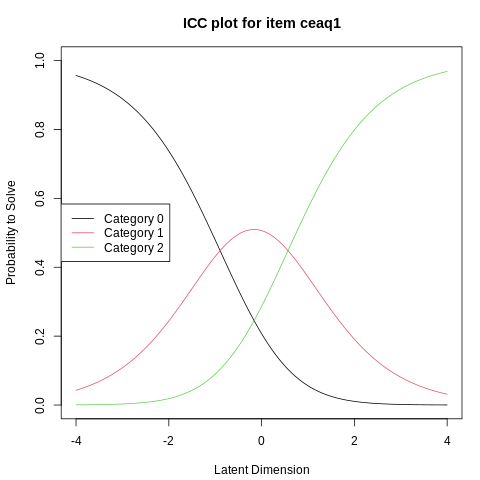

In [ ]:
%%R
plotICC(fitrsm2, item.subset = 1)

Another plotting option, which summarizes nicely the entire set of parameter
estimates, is the person-item map.

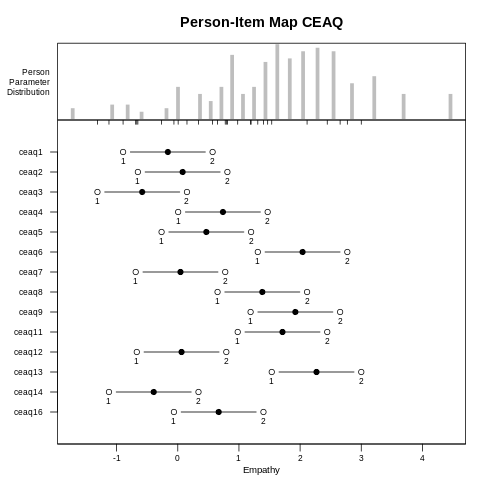

In [ ]:
%%R
plotPImap(fitrsm2, latdim = "Empathy", main = "Person-Item Map CEAQ")

As this plot nicely illustrates, item differences occur due to location shifts only.
That is, we fit one set of threshold parameters for all items, which is then shifted
across the items via the location parameter. This means that RSM assumes  the relative distances between the response categories to be the same for all items, which is a strong assumption that might not always hold in practice.
This is a main feature of the RSM and will be relaxed in the next section.

### Test your understanding

- Based on the thpar output, which item appears to be the easiest? Which appears to be the most difficult? Discuss with your collegues.
- Looking at the person-item map, are there any respondents who seem to have very high or very low levels of empathy? How can you tell?